In [1]:
#Crie um vetor ordenado com 500 números aleatórios distribuídos gaussianamente com centro em 5 e desvio padrão de 1
#suporemos que é a distribuição de notas de uma turma de estatística

# dicas: - pode utilizar a função random.normal(mu, sigma, N) da bibliteca numpy
#        - para criar um vetor pode-se utilizar a função random.normal e limitar os resultados, em termos de intervalo e tamanho do vetor, conforme exemplo abaixo de um vetor de 10 números
#          distribuídos gaussinamente em torno de 1 com desvio padrão de 0.2

#Esta será a sua distribuição experimental (diferente de distribuição analítica)
import numpy as np

dados_exemplo = sorted([np.random.uniform(0,10) for n in range(100)])

In [2]:
import numpy as np

dados = sorted(np.random.normal(5,1,500))

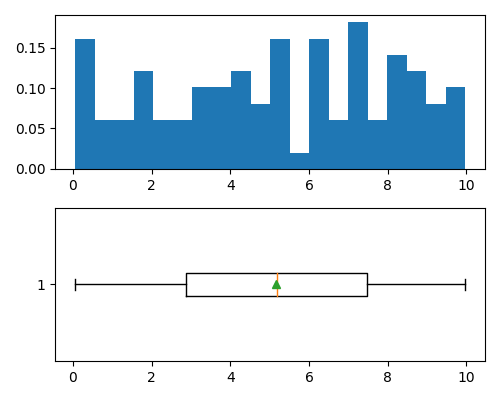

In [3]:
#Plote o histograma e o boxplot da distribuição experimental acima
# dicas: - siga o exemplo abaixo para a construção de dados de frequência dada a distribuição
#        - documentação: https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py

import matplotlib.pyplot as plt
f, (ax1,ax2) = plt.subplots(2,1,figsize=(5, 4))

ax1.hist(dados_exemplo,bins=20,density=True)
ax2.boxplot(dados_exemplo,vert=False, showmeans=True)

f.tight_layout()
display(f)

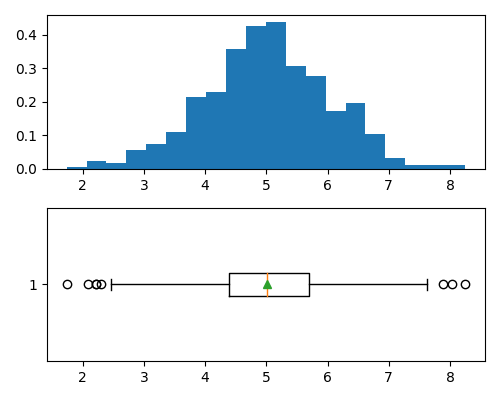

In [4]:
import matplotlib.pyplot as plt
f, (ax1,ax2) = plt.subplots(2,1,figsize=(5, 4))

ax1.hist(dados,bins=20,density=True)
ax2.boxplot(dados,vert=False, showmeans=True)

f.tight_layout()
display(f)

In [5]:
#Supondo que os dados seja uma distribuição normal, ajuste uma curva gaussian à distribuição
#
#dicas:  -faça uso da função "norm" e método "fit" da biblioteca "scipy.stats"
#        -documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [6]:
import scipy.stats as st

parametros = st.norm.fit(dados)

In [7]:
parametros

Out[13]: (5.010941858885685, 1.0297418231287956)

In [8]:
mu = parametros[0]
sigma = parametros[1]

In [9]:
# A partir dos parâmetros do ajuste, infira as regiões de confiança que englobem 68.3% da popoulanção em torno da média, e também 95%
#
#dica: -lembre-se da relação entre as regiões de confiança e o desvio padrão para uma distribuição gaussiana: 68.3%=sigma e 95%=2sigmas

In [10]:
import numpy as np
np.percentile(dados,[68.3,95])

Out[14]: array([5.47379551, 6.72374825])

In [11]:
# 68.3%:
[mu-sigma,mu+sigma]

Out[15]: [3.9812000357568893, 6.040683682014481]

In [12]:
# 95%: 
[mu-2*sigma,mu+2*sigma]

Out[16]: [2.951458212628094, 7.070425505143277]

In [13]:
#Crie um vetor com 1000 pontos que represente a distribuição analítica normal, com parâmetros conforme obtidos acima, este vetor será o seu modelo
# dicas: - pode usar a função linspace para criar um vetor de números distribuídos linearmente e funcionar como a ordenada (eixo x) da sua distribuição analítica
#        - lembre-se de que a função normal tem a forma:
# Normal(x) = (1/(sigma*sqrt(2*pi))) * exp( (-1/2) * ((x-mu)/sigma)^2 )
# onde mu = o centro da distribuição 
#      sigma = a variância da distribuição 
#
#
#        - siga o exemplo abaixo para a construção de dados de frequência dada uma distribuição linear
X_exemplo = np.linspace(0, 10, 1000)
modelo_exemplo = [10/100 for x in X_exemplo] #neste exemplo a função constante, adapte a gaussiana

In [14]:
import numpy as np
X = np.linspace(0, 10, 1000)
modelo = [(1/(sigma*np.sqrt(2*np.pi))) * np.exp( (-1/2) * ((x-mu)/sigma)**2 ) for x in X] #neste exemplo a função constante, adapte a gaussiana

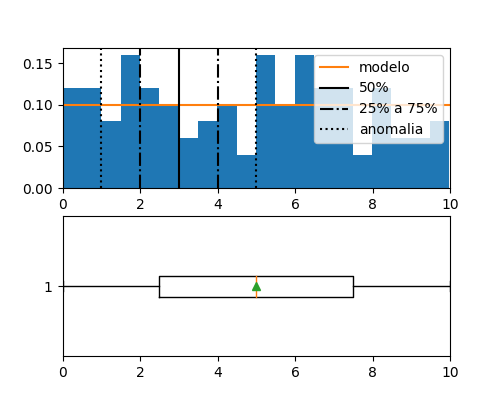

In [15]:
#Plote novamenbte o histograma e o boxplot da distribuição experimental acima, mas sobrepondo o seu modelo ao histograma e colocando retas verticais representando:
# o primeiro quartil (ponto-tracejado), 
# o segundo segundo (contínuo),
# o terceiro (ponto-tracejado) quartil, 
# assim como as zonas de anomalias (pontuado)

# dicas: - siga o exemplo abaixo para a construção de dados de frequência dada a distribuição
#        - documentação: https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py
#        - lembre da relação entre quartis e o desvio padrão de uma distribuição gaussiana: q1=-0.6745*sigma,q3=0.6745*sigma,anomalia=+-2.695*sigma
#        - pode usar o método ax.set_xlim((min,max)) para alinhar eixos de diferentes gráficos

import matplotlib.pyplot as plt
f, (ax1,ax2) = plt.subplots(2,1,figsize=(5, 4))
ax1.hist(dados_exemplo,bins=20,density=True)

ax1.plot(X_exemplo,modelo_exemplo,label='modelo')
ax1.axvline(3,color='black', linestyle='-',label='50%')
ax1.axvline(3-1,color='black', linestyle='-.',label='25% a 75%')
ax1.axvline(3+1,color='black', linestyle='-.')
ax1.axvline(3-2,color='black', linestyle=':',label='anomalia')
ax1.axvline(3+2,color='black', linestyle=':')
ax1.set_xlim((0,10))

ax2.boxplot(X_exemplo,vert=False, showmeans=True)
ax2.set_xlim((0,10))

ax1.legend()
display(f)

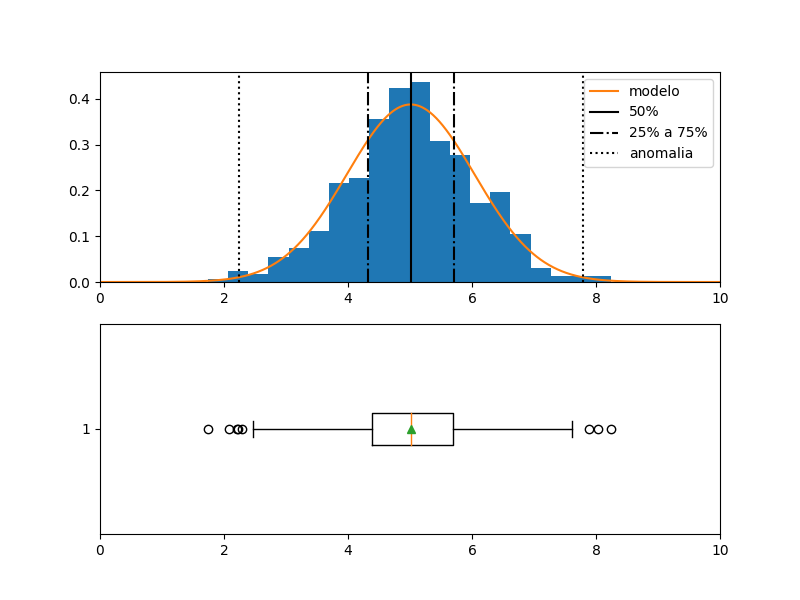

In [16]:
import matplotlib.pyplot as plt
f, (ax1,ax2) = plt.subplots(2,1,figsize=(8, 6))
ax1.hist(dados,bins=20,density=True)

ax1.plot(X,modelo,label='modelo')
ax1.axvline(mu,color='black', linestyle='-',label='50%')
ax1.axvline(mu-0.6745*sigma,color='black', linestyle='-.',label='25% a 75%')
ax1.axvline(mu+0.6745*sigma,color='black', linestyle='-.')
ax1.axvline(mu-2.695*sigma,color='black', linestyle=':',label='anomalia')
ax1.axvline(mu+2.695*sigma,color='black', linestyle=':')
ax1.set_xlim((0,10))

ax2.boxplot(dados,vert=False, showmeans=True)
ax2.set_xlim((0,10))

ax1.legend()
display(f)

In [17]:
[mu-0.6745*sigma,mu+0.6745*sigma]

Out[29]: [4.316380999185313, 5.705502718586057]

In [18]:
[mu-2.695*sigma,mu+2.695*sigma]

Out[30]: [2.235787645553581, 7.78609607221779]